In [992]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
# import to create polynomial features
from sklearn.preprocessing import PolynomialFeatures

# import graphviz
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

# from ydata_profiling import ProfileReport

# import custom functions
from custom_functions import our_metrics

# import custom scorers
from custom_functions import get_kappa

# pd.set_option('display.max_rows', None)

from scipy.stats import loguniform

RSEED = 42

## Importing the Data

In [889]:
# reading in the data sets (for distance based models with dropped first column during dummy creation in order to avoid collinearity)
X_test = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_minmax_scaled_dropped_first.csv', delimiter=',')
X_train = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_minmax_scaled_dropped_first.csv', delimiter=',')
y_test = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test.csv', delimiter=',')
y_train = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train.csv', delimiter=',')

In [890]:
# importing cat DataFrames
X_test_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_cats_dropped.csv', delimiter=',')
X_train_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_cats_dropped.csv', delimiter=',')
y_test_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test_cats.csv', delimiter=',')
y_train_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train_cats.csv', delimiter=',')

In [891]:
# importing cat DataFrames
X_test_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_dogs_dropped.csv', delimiter=',')
X_train_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_dogs_dropped.csv', delimiter=',')
y_test_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test_dogs.csv', delimiter=',')
y_train_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train_dogs.csv', delimiter=',')

### Splitting DataFrames into Cats and Dogs 

In [892]:
# X_train_cats = X_train.query("type == 1").drop('type', axis=1) # 0 dog, 1 cat
# X_train_dogs = X_train.query("type == 0").drop('type', axis=1)
# X_test_cats = X_test.query("type == 1").drop('type', axis=1)
# X_test_dogs = X_test.query("type == 0").drop('type', axis=1)

In [893]:
# ix_train_cats = X_train_cats.index.to_list()
# ix_train_dogs = X_train_dogs.index.to_list()
# ix_test_cats = X_test_cats.index.to_list()
# ix_test_dogs = X_test_dogs.index.to_list()

In [894]:
# y_train_cats = y_train.loc[y_train.index[ix_train_cats]]
# y_train_dogs = y_train.loc[y_train.index[ix_train_dogs]]
# y_test_cats = y_train.loc[y_train.index[ix_test_cats]]
# y_test_dogs = y_train.loc[y_train.index[ix_test_dogs]]

In [895]:
# change format of y from dataframe to array
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)
y_train_cats = np.ravel(y_train_cats)
y_train_dogs = np.ravel(y_train_dogs)
y_test_cats = np.ravel(y_test_cats)
y_test_dogs = np.ravel(y_test_dogs)

## Predictive Modelling with a Logistic Regression

### Default Logistic Regression

In [896]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3872
_____________________
Weighted Quadratic Kappa: 0.2909


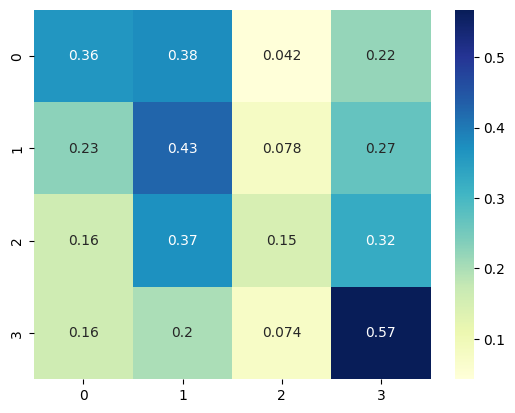

In [897]:
our_metrics(y_train, y_pred_train, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3938
_____________________
Weighted Quadratic Kappa: 0.2989


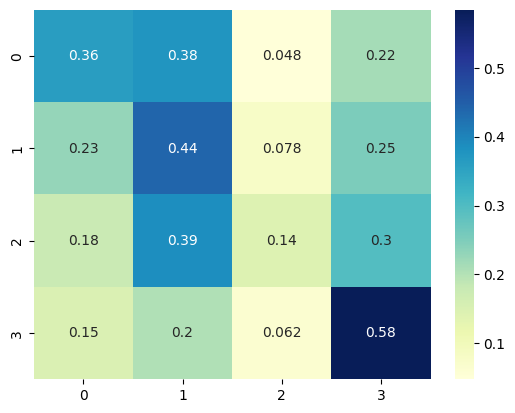

In [898]:
our_metrics(y_test, y_pred_test, normalize=True)

### Default Logistic Regression for Cats and Dogs Separately

In [899]:
# Logistic Regression
log_reg_cats = LogisticRegression(max_iter=1000)
log_reg_cats.fit(X_train_cats, y_train_cats)

log_reg_dogs = LogisticRegression(max_iter=1000)
log_reg_dogs.fit(X_train_dogs, y_train_dogs)

y_pred_train_cats = log_reg_cats.predict(X_train_cats)
y_pred_test_cats = log_reg_cats.predict(X_test_cats)

y_pred_train_dogs = log_reg_dogs.predict(X_train_dogs)
y_pred_test_dogs = log_reg_dogs.predict(X_test_dogs)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3814
_____________________
Weighted Quadratic Kappa: 0.2689


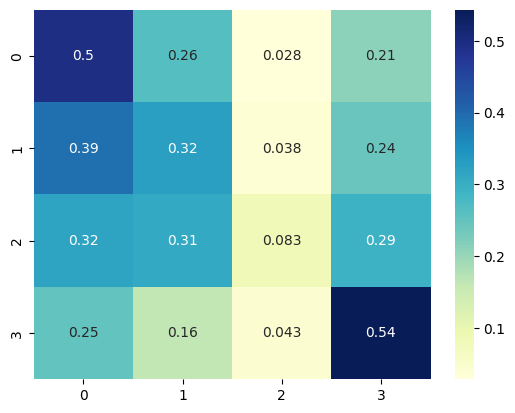

In [900]:
our_metrics(y_train_cats, y_pred_train_cats, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4035
_____________________
Weighted Quadratic Kappa: 0.3617


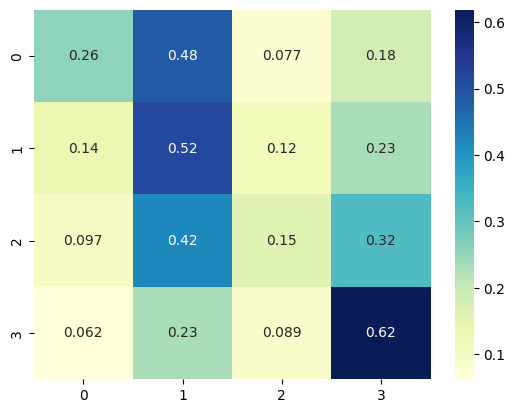

In [901]:
our_metrics(y_train_dogs, y_pred_train_dogs, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4029
_____________________
Weighted Quadratic Kappa: 0.2964


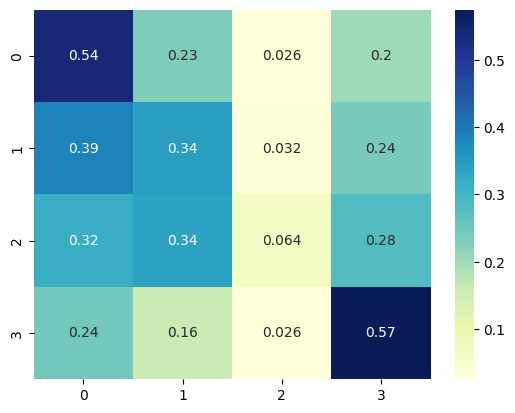

In [902]:
our_metrics(y_test_cats, y_pred_test_cats, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3992
_____________________
Weighted Quadratic Kappa: 0.3241


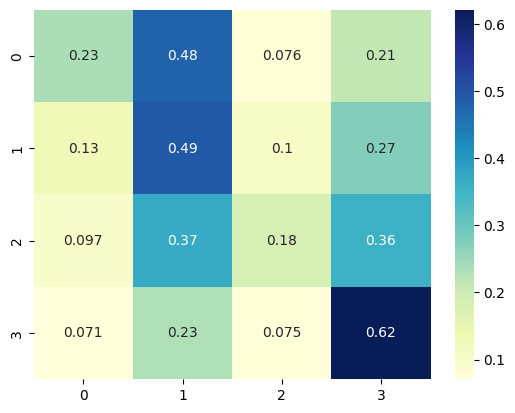

In [903]:
our_metrics(y_test_dogs, y_pred_test_dogs, normalize=True)

## Hyperparameter Tuning with Random Search

### Accuracy Scorer

In [904]:
#what parameters does LogisticRegression have?
log_reg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

### Hyperparameters of the LogisticRegression

- 'C' : float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
- 'class_weight' : dict or ‘balanced’, default=None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
- 'dual' : bool, default=False
Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.
- 'fit_intercept' : bool, default=True
Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
- 'intercept_scaling' : float, default=1
Useful only when the solver ‘liblinear’ is used and ...
- 'l1_ratio': float, default=None
The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.
- 'max_iter' : int, default=100
Maximum number of iterations taken for the solvers to converge
- 'multi_class': {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.
- n_jobs': int, default=None
- 'penalty' : {‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
- 'random_state' : int, RandomState instance, default=None
Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data.
- 'solver' : {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
‘liblinear’ is limited to one-versus-rest schemes.
‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.
Warning: The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
‘lbfgs’ - [‘l2’, None]
‘liblinear’ - [‘l1’, ‘l2’]
‘newton-cg’ - [‘l2’, None]
‘newton-cholesky’ - [‘l2’, None]
‘sag’ - [‘l2’, None]
‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]
- 'tol' : float, default=1e-4
Tolerance for stopping criteria.
- 'verbose' : int, default=0
For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.
- 'warm_start' : bool, default=False
When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. Useless for liblinear solver.

### Hyperparameter Tuning for Cats

In [905]:
 # Define parameter grid for randomized search
param_grid_cats = {#'C' : loguniform(1e-5, 200),
              'C' : np.linspace(0.001, 10, 50),
#              'l1_ratio' : np.linspace(0, 1, 20), 
              'penalty' : ['l1', 'l2', None],# 'elasticnet']
              'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']#,
#              'class_weight' : ['balanced', None]
             }

In [906]:
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [907]:
#multi_class=‘auto’/‘multinomial’ multi_class='multinomial'
# Instantiate random search and define the metric to optimize 
rs_cats = RandomizedSearchCV(LogisticRegression(random_state=RSEED,max_iter=1000), param_grid_cats, scoring='accuracy',
                  cv=5, verbose=0, n_jobs=-1, n_iter=40, random_state=RSEED)#cv=5

In [908]:
# Fit randomized search object to data
rs_cats.fit(X_train_cats, y_train_cats)

/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 2.05061224e-01, 4.09122449e-01, 6.13183673e-01,
       8.17244898e-01, 1.02130612e+00, 1.22536735e+00, 1.42942857e+00,
       1.63348980e+00, 1.83755102e+00, 2.04161224e+00, 2.24567347e+00,
       2.44973469e+00, 2.65379592e+00, 2.85...
       6.53095918e+00, 6.73502041e+00, 6.93908163e+00, 7.14314286e+00,
       7.34720408e+00, 7.55126531e+00, 7.75532653e+00, 7.95938776e+00,
       8.16344898e+00, 8.36751020e+00, 8.57157143e+00, 8.77563265e+00,
       8.97969388e+00, 9.18375510e+00, 9.38781633e+00, 9.59187755e+00,
       9.79593878e+00, 1.00000000e+01]),
                                        'penalty': ['l1', 'l2', None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [909]:
# Best score
print('Best score:', round(rs_cats.best_score_, 3))

# Best parameters
print('Best parameters:', rs_cats.best_params_)

Best score: 0.367
Best parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.20506122448979594}


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3981
_____________________
Weighted Quadratic Kappa: 0.2856


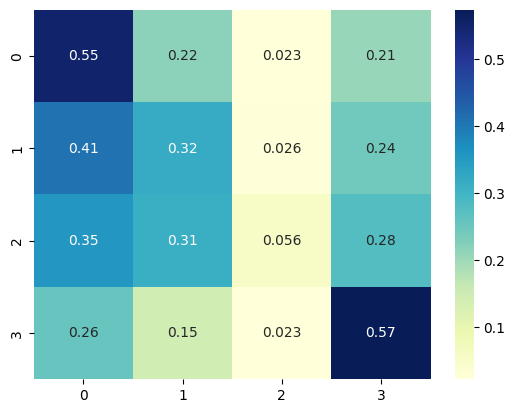

In [910]:
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_rs
log_reg_best_rs_cats = rs_cats.best_estimator_

# Making predictions on the test set
y_pred_test_rs_cats = log_reg_best_rs_cats.predict(X_test_cats)

# Let us print out the performance of our model on the test set.
our_metrics(y_test_cats, y_pred_test_rs_cats, normalize=True)

### Hyperparameter Tuning for Dogs

In [951]:
# Define parameter grid for randomized search
param_grid_dogs = {'C' : loguniform(1e-5, 200),
              #'C' : np.linspace(0.001, 10, 50),
#              'l1_ratio' : np.linspace(0, 1, 20), 
              'penalty' : ['l1', 'l2', None],#, 'elasticnet'],
              'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
#              'class_weight' : ['balanced', None]
             }
#multi_class=‘auto’/‘multinomial’ multi_class='multinomial'

In [952]:
# Instantiate random search and define the metric to optimize 
rs_dogs = RandomizedSearchCV(LogisticRegression(random_state=RSEED,max_iter=1000), param_grid_dogs, scoring='accuracy',
                  cv=cv, verbose=0, n_jobs=-1, n_iter=40, random_state=RSEED)
# Fit randomized search object to data
rs_dogs.fit(X_train_dogs, y_train_dogs)

/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15588b550>,
                                        'penalty': ['l1', 'l2', None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [953]:
# Best score
print('Best score:', round(rs_dogs.best_score_, 3))

# Best parameters
print('Best parameters:', rs_dogs.best_params_)

Best score: 0.398
Best parameters: {'C': 0.08715823901869026, 'penalty': 'l2', 'solver': 'lbfgs'}


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3998
_____________________
Weighted Quadratic Kappa: 0.3193


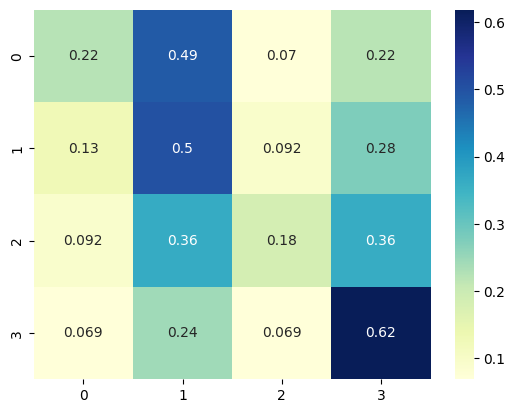

In [954]:
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_rs
log_reg_best_rs_dogs = rs_dogs.best_estimator_

# Making predictions on the test set
y_pred_test_rs_dogs = log_reg_best_rs_dogs.predict(X_test_dogs)

# Let us print out the performance of our model on the test set.
our_metrics(y_test_dogs, y_pred_test_rs_dogs, normalize=True)

### Combined Hypertuning

In [955]:
 # Define parameter grid for randomized search
param_grid = {'C' : loguniform(1e-5, 200),
#              'C' : np.linspace(0.1, 10, 50),
#              'l1_ratio' : np.linspace(0, 1, 20), 
              'penalty' : ['l1', 'l2', None],#, 'elasticnet'],
              'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
#              'class_weight' : ['balanced', None]
             }

In [956]:
#multi_class=‘auto’/‘multinomial’ multi_class='multinomial'
# Instantiate random search and define the metric to optimize 
rs = RandomizedSearchCV(LogisticRegression(random_state=RSEED,max_iter=1000), param_grid, scoring='accuracy',
                  cv=5, verbose=1, n_jobs=-1, n_iter=40, random_state=RSEED)

In [957]:
# Fit randomized search object to data
rs.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1559f84d0>,
                                        'penalty': ['l1', 'l2', None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy', verbose=1)

In [958]:
# Best score
print('Best score:', round(rs.best_score_, 3))

# Best parameters
print('Best parameters:', rs.best_params_)

Best score: 0.381
Best parameters: {'C': 0.2931948497951034, 'penalty': 'l2', 'solver': 'newton-cholesky'}


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3897
_____________________
Weighted Quadratic Kappa: 0.2943


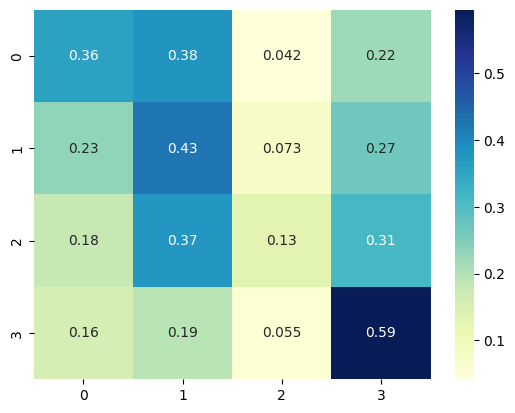

In [959]:
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_rs
log_reg_best_rs = rs.best_estimator_

# Making predictions on the test set
y_pred_test_rs = log_reg_best_rs.predict(X_test)

# Let us print out the performance of our model on the test set.
our_metrics(y_test, y_pred_test_rs, normalize=True)

## RandomSearch with Quadratic Weighted Kappa Scorer

In [1046]:
 # Define parameter grid for randomized search
param_grid = {#'C' : loguniform(1e-5, 200),
              'C' : np.linspace(0.1, 10, 50),
#              'l1_ratio' : np.linspace(0, 1, 20), 
              'penalty' : ['l1', 'l2', None],#, 'elasticnet'],
              'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
#              'class_weight' : ['balanced', None]
             }

In [1047]:
# make the kappa scorers needed for the grid search
kappa_scorer = get_kappa()

In [1048]:
# #multi_class=‘auto’/‘multinomial’
# Instantiate random search and define the metric to optimize 
rs_kappa = RandomizedSearchCV(LogisticRegression(random_state=RSEED,max_iter=1000), param_grid, scoring=kappa_scorer,
                  cv=5, verbose=0, n_jobs=-1, n_iter=50, random_state=RSEED)

In [1049]:
# Fit randomized search object to data
rs_kappa.fit(X_train, y_train)

/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857143,
        3.13061224,  3.33265306,  3.53469388,  3.73673469,  3.93877551,
        4.1...
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ]),
                                        'penalty': ['l1', 'l2', None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42,
                   scoring=make_scorer(cohen_kappa_score, weights=quadratic))

In [1050]:
# Best score
print('Best score:', round(rs_kappa.best_score_, 3))

# Best parameters
print('Best parameters:', rs_kappa.best_params_)

Best score: 0.287
Best parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.3020408163265306}


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.389
_____________________
Weighted Quadratic Kappa: 0.2903


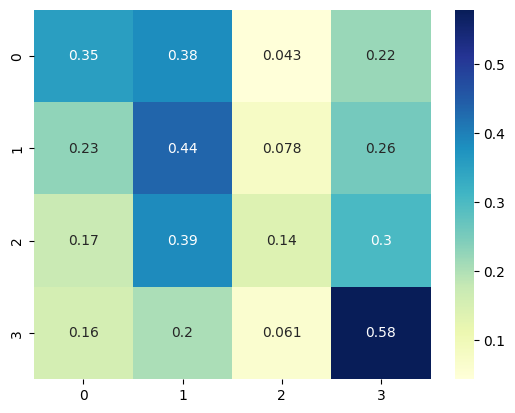

In [1051]:
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_rs_kappa
log_reg_best_rs_kappa = rs_kappa.best_estimator_

# Making predictions on the test set
y_pred_test_rs_kappa = log_reg_best_rs_kappa.predict(X_test)

# Let us print out the performance of our model on the test set.
our_metrics(y_test, y_pred_test_rs_kappa, normalize=True)

In [1052]:
# y_pred_train_rs_kappa = log_reg_best_rs_kappa.predict(X_train)
# our_metrics(y_train, y_pred_train_rs_kappa, normalize=True)

### Kappa Scorer for Cats and Dogs Separately

### Hyperparameter Tuning for Cats

In [1053]:
# define evaluation
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#multi_class=‘auto’/‘multinomial’ multi_class='multinomial'
# Instantiate random search and define the metric to optimize 
rs_cats_kappa = RandomizedSearchCV(LogisticRegression(random_state=RSEED,max_iter=1000), param_grid, scoring=kappa_scorer,
                  cv=5, verbose=0, n_jobs=-1, n_iter=40, random_state=RSEED)#cv=5

In [1054]:
# Fit randomized search object to data
rs_cats_kappa.fit(X_train_cats, y_train_cats)

/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.

/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/py

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'C': array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857143,
        3.13061224,  3.33265306,  3.53469388,  3.73673469,  3.93877551,
        4.1...
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ]),
                                        'penalty': ['l1', 'l2', None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42,
                   scoring=make_scorer(cohen_kappa_score, weights=quadratic))

In [1055]:
# Best score
print('Best score:', round(rs_cats_kappa.best_score_, 3))

# Best parameters
print('Best parameters:', rs_cats_kappa.best_params_)

Best score: 0.261
Best parameters: {'solver': 'newton-cholesky', 'penalty': None, 'C': 2.5244897959183676}


In [1056]:
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_rs
log_reg_best_rs_cats_kappa = rs_cats_kappa.best_estimator_

# Making predictions on the test set
y_pred_test_rs_cats_kappa = log_reg_best_rs_cats_kappa.predict(X_test_cats)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.407
_____________________
Weighted Quadratic Kappa: 0.2933


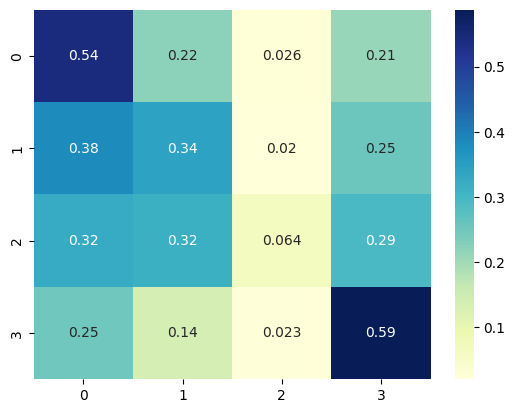

In [1057]:
# Let us print out the performance of our model on the test set.
our_metrics(y_test_cats, y_pred_test_rs_cats_kappa, normalize=True)

### Hyperparameter Tuning for Dogs

In [1058]:
#multi_class=‘auto’/‘multinomial’ multi_class='multinomial'
# Instantiate random search and define the metric to optimize 
rs_dogs_kappa = RandomizedSearchCV(LogisticRegression(random_state=RSEED,max_iter=1000), param_grid, scoring=kappa_scorer,
                  cv=cv, verbose=0, n_jobs=-1, n_iter=40, random_state=RSEED)
# Fit randomized search object to data
rs_dogs_kappa.fit(X_train_dogs, y_train_dogs)

/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'C': array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857...
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ]),
                                        'penalty': ['l1', 'l2', None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42,
                   scoring=make_scorer(cohen_kappa_score, weights=quadratic))

In [1059]:
# Best score
print('Best score:', round(rs_dogs_kappa.best_score_, 3))

# Best parameters
print('Best parameters:', rs_dogs_kappa.best_params_)

Best score: 0.36
Best parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.3020408163265306}


In [1060]:
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_rs
log_reg_best_rs_dogs_kappa = rs_dogs_kappa.best_estimator_

In [1061]:
# Making predictions on the test set
y_pred_test_rs_dogs_kappa = log_reg_best_rs_dogs_kappa.predict(X_test_dogs)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4046
_____________________
Weighted Quadratic Kappa: 0.3296


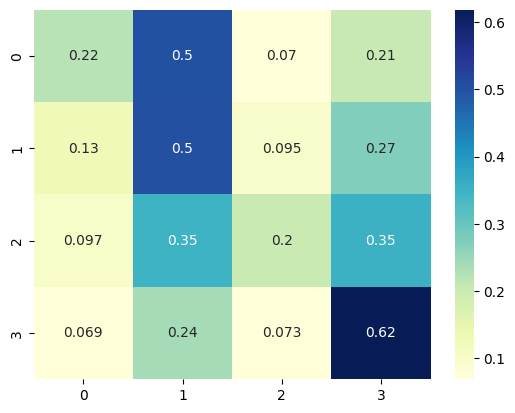

In [1062]:
# Let us print out the performance of our model on the test set.
our_metrics(y_test_dogs, y_pred_test_rs_dogs_kappa, normalize=True)

## GridSearch

In [1063]:
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [1064]:
# Defining parameter grid (as dictionary)
# default logistic regression: : C=1 , penalty l2, solver='lbfgs'
param_grid_gs = {"C" : [0.2, 0.5, 1, 2, 5, 10, 15, 20],
              "penalty" : ["l2", "l1", None],
              'solver' : ['lbfgs', 'saga', 'liblinear', 'newton-cholesky'],
#              'class_weight' : ['balanced', None]
             }

In [1065]:
# Instantiate gridsearch and define the metric to optimize 
gs_cats = GridSearchCV(LogisticRegression(random_state=RSEED), param_grid_gs, scoring='accuracy',
                  cv=5, verbose=0, n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
gs_cats.fit(X_train_cats, y_train_cats)

/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.2, 0.5, 1, 2, 5, 10, 15, 20],
                         'penalty': ['l2', 'l1', None],
                         'solver': ['lbfgs', 'saga', 'liblinear',
                                    'newton-cholesky']},
             scoring='accuracy')

In [1066]:
# Best score
print('Best score:', round(gs_cats.best_score_, 3))

# Best parameters
print('Best parameters:', gs_cats.best_params_)

Best score: 0.368
Best parameters: {'C': 0.2, 'penalty': 'l1', 'solver': 'saga'}


In [1067]:
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_rs_kappa
log_reg_best_gs_cats = gs_cats.best_estimator_

# Making predictions on the test set
y_pred_test_gs_cats = log_reg_best_gs_cats.predict(X_test_cats)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3981
_____________________
Weighted Quadratic Kappa: 0.2851


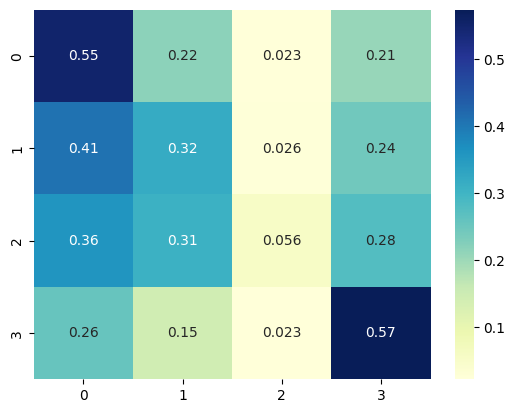

In [1068]:
our_metrics(y_test_cats, y_pred_test_gs_cats, normalize=True)

/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.

Best score: 0.4
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3998
_____________________
Weighted Quadratic Kappa: 0.3232


/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(

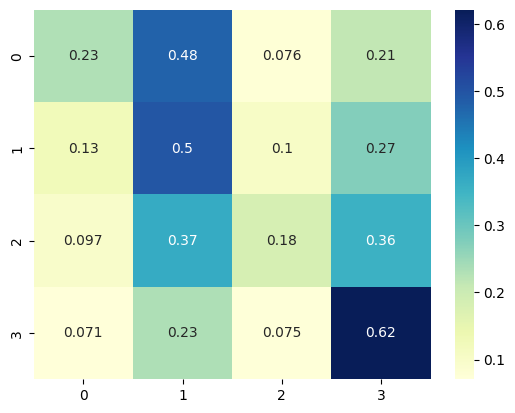

In [1069]:
# Instantiate gridsearch and define the metric to optimize 
gs_dogs = GridSearchCV(LogisticRegression(random_state=RSEED), param_grid_gs, scoring='accuracy',
                  cv=5, verbose=0, n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
gs_dogs.fit(X_train_dogs, y_train_dogs)
# Best score
print('Best score:', round(gs_dogs.best_score_, 3))

# Best parameters
print('Best parameters:', gs_dogs.best_params_)
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_rs_kappa
log_reg_best_gs_dogs = gs_dogs.best_estimator_

# Making predictions on the test set
y_pred_test_gs_dogs = log_reg_best_gs_dogs.predict(X_test_dogs)
our_metrics(y_test_dogs, y_pred_test_gs_dogs, normalize=True)

### GridSearch with Kappa-Scorer

In [1088]:
# Instantiate gridsearch and define the metric to optimize 
gs_cats_kappa = GridSearchCV(LogisticRegression(random_state=RSEED), param_grid_gs, scoring=kappa_scorer,
                  cv=5, verbose=0, n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
gs_cats_kappa.fit(X_train_cats, y_train_cats)

/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.

Best score: 0.261
Best parameters: {'C': 20, 'penalty': 'l1', 'solver': 'liblinear'}


/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are n

In [1091]:
# Best score
print('Best score:', round(gs_cats_kappa.best_score_, 3))

# Best parameters
print('Best parameters:', gs_cats_kappa.best_params_)
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_rs_kappa
log_reg_best_gs_cats_kappa = gs_cats_kappa.best_estimator_

Best score: 0.261
Best parameters: {'C': 20, 'penalty': 'l1', 'solver': 'liblinear'}


In [1089]:
# Making predictions on the test set
y_pred_test_gs_cats_kappa = log_reg_best_gs_cats_kappa.predict(X_test_cats)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4053
_____________________
Weighted Quadratic Kappa: 0.2921


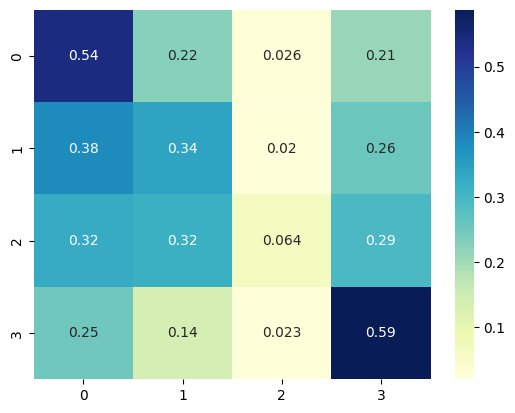

In [1090]:
our_metrics(y_test_cats, y_pred_test_gs_cats_kappa, normalize=True)

In [1093]:
# Instantiate gridsearch and define the metric to optimize 
gs_dogs_kappa = GridSearchCV(LogisticRegression(random_state=RSEED), param_grid_gs, scoring=kappa_scorer,
                  cv=5, verbose=0, n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
gs_dogs_kappa.fit(X_train_dogs, y_train_dogs)

/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.2, 0.5, 1, 2, 5, 10, 15, 20],
                         'penalty': ['l2', 'l1', None],
                         'solver': ['lbfgs', 'saga', 'liblinear',
                                    'newton-cholesky']},
             scoring=make_scorer(cohen_kappa_score, weights=quadratic))

In [1094]:
# Best score
print('Best score:', round(gs_dogs_kappa.best_score_, 3))

# Best parameters
print('Best parameters:', gs_dogs_kappa.best_params_)

Best score: 0.365
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [1095]:
# Assigning the fitted LogisticRegression model with best parameter combination to a new variable log_reg_best_rs_kappa
log_reg_best_gs_dogs_kappa = gs_dogs_kappa.best_estimator_

In [1096]:
# Making predictions on the test set
y_pred_test_gs_dogs_kappa = log_reg_best_gs_dogs_kappa.predict(X_test_dogs)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3998
_____________________
Weighted Quadratic Kappa: 0.3244


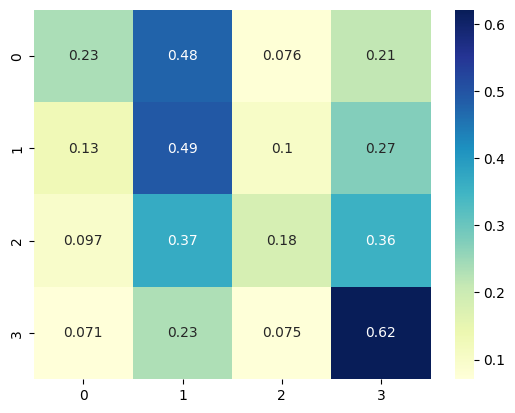

In [1097]:
our_metrics(y_test_dogs, y_pred_test_gs_dogs_kappa, normalize=True)

In [1070]:
# test_proba_49 = class_metrics_var_threshold(eec_best, X_test_tree, y_test_tree, threshold=0.49)
# Changing the threshold slightly does not improve the model:
# * changing the threshold to 0.6 is equivalent to predicting no one commits fraud
# * changing the threshold to 0.49 yields a lot of true positives, hardly any false negatives. However, this comes at the price of a lot of false positive predictions. 
# # get scorers for different thresholds
# test_proba = class_metrics_var_threshold(eec_best, X_test_tree, y_test_tree, threshold=0.5)

## Splitting Cats and Dogs, Combine Target 2 & 3

Combining Targets 2 and 3 did not turn out to be helpful: For LogisticRegression, combining the middle two categories creates imbalanced data problems (the middle category then is represented twice as often as the other two, roughly), which makes the model lean towards predicting the middle category. I.e., performance on target 1 and 4 observation really suffers when combining targets 2 and 3. So for Logistic Regression, we will not pursue this any further but rather stick with 4 target categories.

In [1071]:
# combine Target 2 and 3
y_train_cats_comb = [x -1 if x >= 3 else x for x in y_train_cats]
y_test_cats_comb = [x -1 if x >= 3 else x for x in y_test_cats]
y_train_dogs_comb = [x -1 if x >= 3 else x for x in y_train_dogs]
y_test_dogs_comb = [x -1 if x >= 3 else x for x in y_test_dogs]

In [1072]:
# print(np.unique(y_test_dogs_comb, return_counts=True))
# print(np.unique(y_test_cats_comb, return_counts=True))

In [1073]:
# Logistic Regression
log_reg_cats_comb = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_cats_comb.fit(X_train_cats, y_train_cats_comb)

log_reg_dogs_comb = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_dogs_comb.fit(X_train_dogs, y_train_dogs_comb)

y_pred_train_cats_comb = log_reg_cats_comb.predict(X_train_cats)
y_pred_test_cats_comb = log_reg_cats_comb.predict(X_test_cats)

y_pred_train_dogs_comb = log_reg_dogs_comb.predict(X_train_dogs)
y_pred_test_dogs_comb = log_reg_dogs_comb.predict(X_test_dogs)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4416
_____________________
Weighted Quadratic Kappa: 0.2702


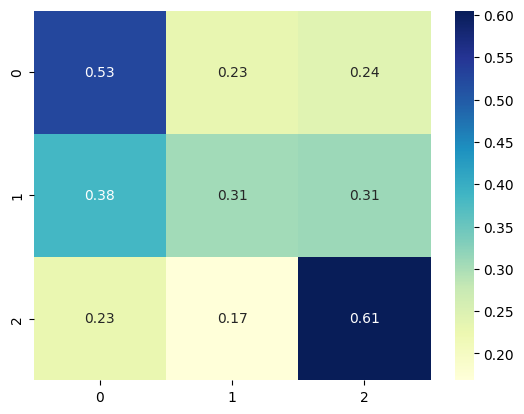

In [1074]:
# train data
our_metrics(y_train_cats_comb, y_pred_train_cats_comb, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4815
_____________________
Weighted Quadratic Kappa: 0.3413


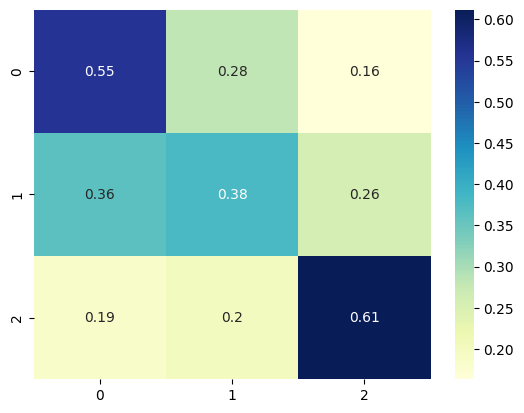

In [1075]:
our_metrics(y_train_dogs_comb, y_pred_train_dogs_comb, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4733
_____________________
Weighted Quadratic Kappa: 0.305


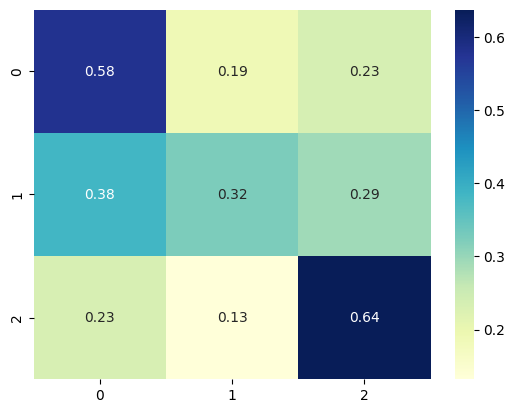

In [1076]:
# test data
our_metrics(y_test_cats_comb, y_pred_test_cats_comb, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4698
_____________________
Weighted Quadratic Kappa: 0.3101


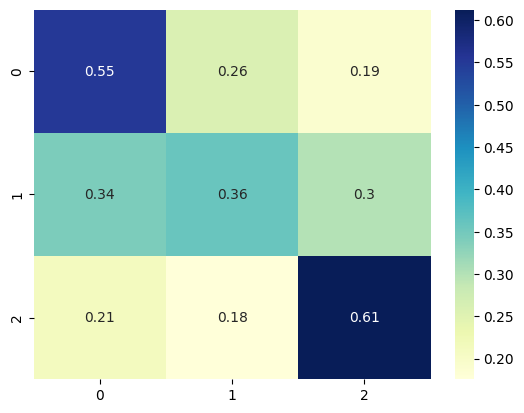

In [1077]:
our_metrics(y_test_dogs_comb, y_pred_test_dogs_comb, normalize=True)

In [1078]:
# # define evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

## All or Nothing

In [1079]:
# combine Target 2 and 3
y_train_cats_comb2 = [0 if x <= 3 else 1 for x in y_train_cats]
y_test_cats_comb2 = [0 if x <= 3 else 1 for x in y_test_cats]
y_train_dogs_comb2 = [0 if x <= 3 else 1 for x in y_train_dogs]
y_test_dogs_comb2 = [0 if x <= 3 else 1 for x in y_test_dogs]

In [1080]:

# print(np.unique(y_test_dogs_comb2, return_counts=True))
# print(np.unique(y_test_cats_comb2, return_counts=True))
# Logistic Regression
log_reg_cats_comb2 = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_cats_comb2.fit(X_train_cats, y_train_cats_comb2)

log_reg_dogs_comb2 = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_dogs_comb2.fit(X_train_dogs, y_train_dogs_comb2)

y_pred_train_cats_comb2 = log_reg_cats_comb2.predict(X_train_cats)
y_pred_test_cats_comb2 = log_reg_cats_comb2.predict(X_test_cats)

y_pred_train_dogs_comb2 = log_reg_dogs_comb2.predict(X_train_dogs)
y_pred_test_dogs_comb2 = log_reg_dogs_comb2.predict(X_test_dogs)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.6714
_____________________
Weighted Quadratic Kappa: 0.2754


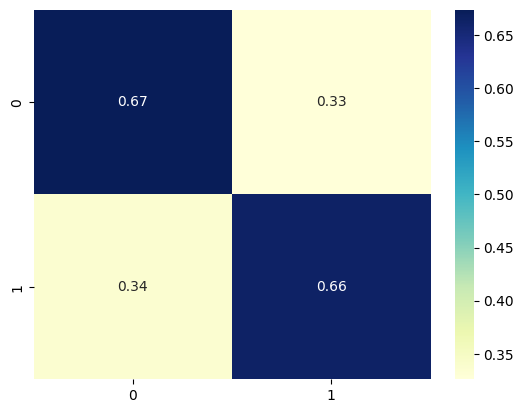

In [1081]:
# train data
our_metrics(y_train_cats_comb2, y_pred_train_cats_comb2, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.7187
_____________________
Weighted Quadratic Kappa: 0.3605


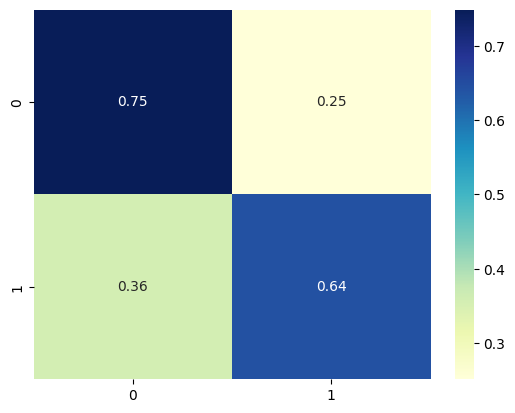

In [1082]:
our_metrics(y_train_dogs_comb2, y_pred_train_dogs_comb2, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.6934
_____________________
Weighted Quadratic Kappa: 0.3231


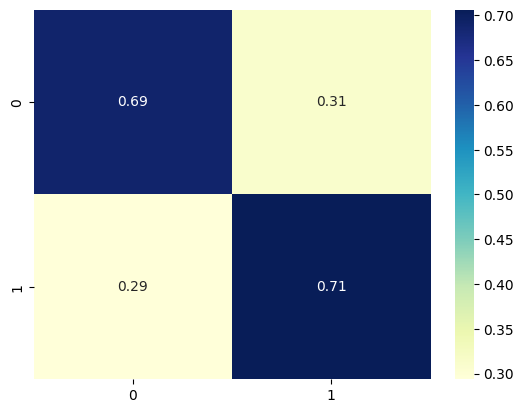

In [1083]:
# test data
our_metrics(y_test_cats_comb2, y_pred_test_cats_comb2, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.6896
_____________________
Weighted Quadratic Kappa: 0.3098


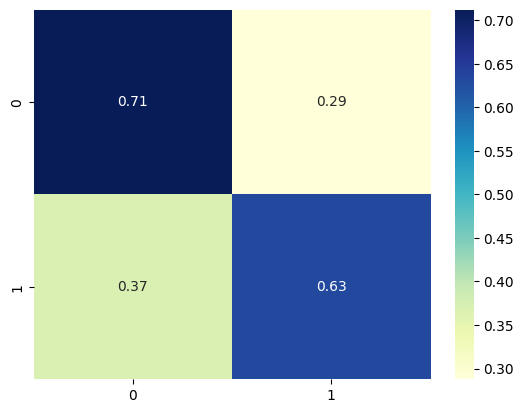

In [1084]:
our_metrics(y_test_dogs_comb2, y_pred_test_dogs_comb2, normalize=True)

In [1085]:
feat_imp_cats = pd.DataFrame(
    data= np.transpose(log_reg_cats_comb2.coef_) , 
    index=X_train_cats.columns.to_list(), 
    columns=['feature_importance']
    ).reindex(feat_imp_cats.feature_importance.abs().sort_values(ascending=False).index)
feat_imp_cats

,feature_importance
age_bin,2.411982
description_char,-1.387732
photoamt_11,-1.323698
maturitysize_3,-1.173993
furlength_2,-1.114939
health_2,0.907136
sterilized,-0.453483
fee_bin,0.413685
maturitysize_2,-0.338038
health_1,0.262129


In [1086]:
feat_imp_dogs = pd.DataFrame(data= np.transpose(log_reg_dogs_comb2.coef_) , index=X_train_dogs.columns.to_list(), columns=['feature_importance'])
feat_imp_dogs.reindex(feat_imp_dogs.feature_importance.abs().sort_values(ascending=False).index)

,feature_importance
age_bin,2.427793
breed_type,2.061557
maturitysize_3,-1.752525
photoamt_11,-1.447790
description_char,-0.963487
furlength_2,-0.828092
health_1,0.534722
health_2,0.509971
sterilized,-0.459799
fee_bin,0.297381


## Polynomial Features

In [1098]:
# here we will add the second degree polynomial features
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

model_poly = LogisticRegression(max_iter=1000)
model_poly.fit(X_poly_train, y_train)
y_pred_poly_test = model_poly.predict(X_poly_test)
y_pred_poly_train = model_poly.predict(X_poly_train)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4193
_____________________
Weighted Quadratic Kappa: 0.3533


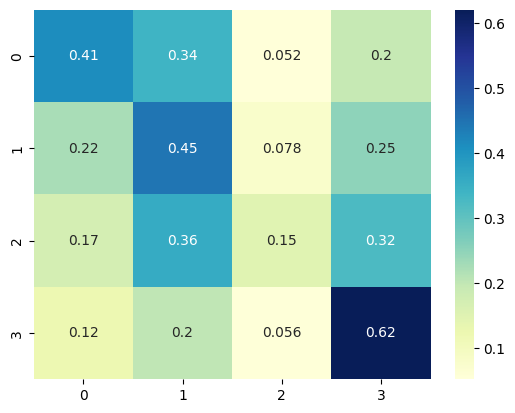

In [1099]:
our_metrics(y_train, y_pred_poly_train, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4042
_____________________
Weighted Quadratic Kappa: 0.341


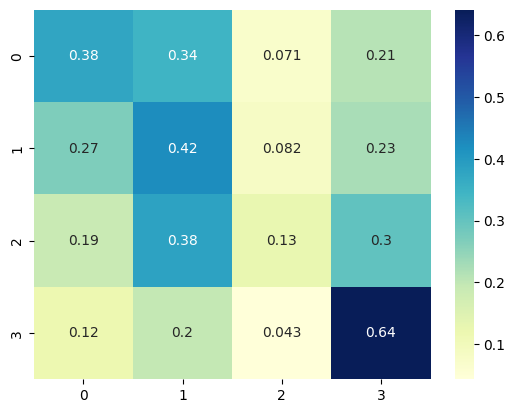

In [1100]:
our_metrics(y_test, y_pred_poly_test, normalize=True)

polynomial Features increase accuracy, already for the default logistic regression.

## Polynomial Features for Cats and Dogs separately

In [1101]:
# here we will add the second degree polynomial features
polynomial_features_cats = PolynomialFeatures(degree=2, include_bias=False)
polynomial_features_dogs = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train_cats = polynomial_features.fit_transform(X_train_cats)
X_poly_test_cats = polynomial_features.transform(X_test_cats)
X_poly_train_dogs = polynomial_features.fit_transform(X_train_dogs)
X_poly_test_dogs = polynomial_features.transform(X_test_dogs)

In [1102]:
model_poly_cats = LogisticRegression(max_iter=1000)
model_poly_cats.fit(X_poly_train_cats, y_train_cats)

LogisticRegression(max_iter=1000)

In [1103]:
y_pred_poly_cats_test = model_poly_cats.predict(X_poly_test_cats)
y_pred_poly_cats_train = model_poly_cats.predict(X_poly_train_cats)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4257
_____________________
Weighted Quadratic Kappa: 0.3301


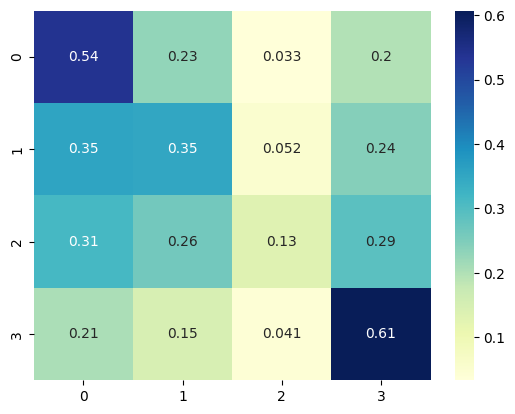

In [1104]:
our_metrics(y_train_cats, y_pred_poly_cats_train, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3964
_____________________
Weighted Quadratic Kappa: 0.2997


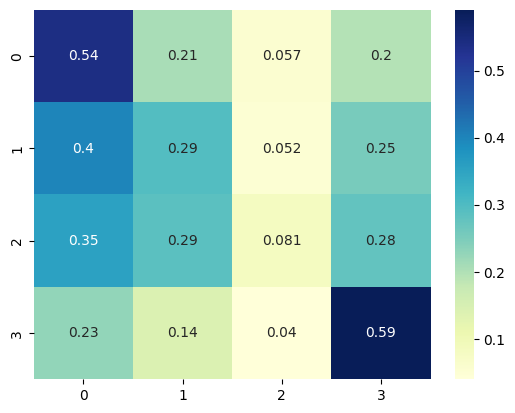

In [1105]:
our_metrics(y_test_cats, y_pred_poly_cats_test, normalize=True)

In [1106]:
model_poly_dogs = LogisticRegression(max_iter=1000)
model_poly_dogs.fit(X_poly_train_dogs, y_train_dogs)
y_pred_poly_dogs_test = model_poly_dogs.predict(X_poly_test_dogs)
y_pred_poly_dogs_train = model_poly_dogs.predict(X_poly_train_dogs)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4402
_____________________
Weighted Quadratic Kappa: 0.3942


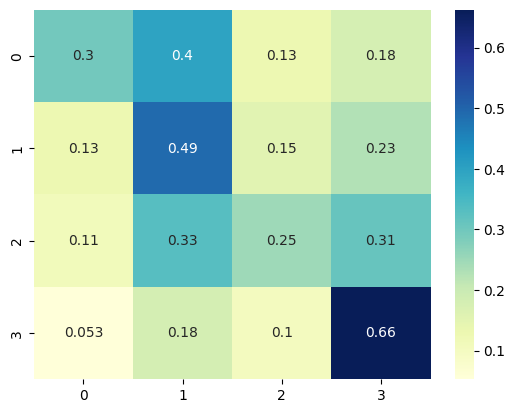

In [1107]:
our_metrics(y_train_dogs, y_pred_poly_dogs_train, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3955
_____________________
Weighted Quadratic Kappa: 0.3413


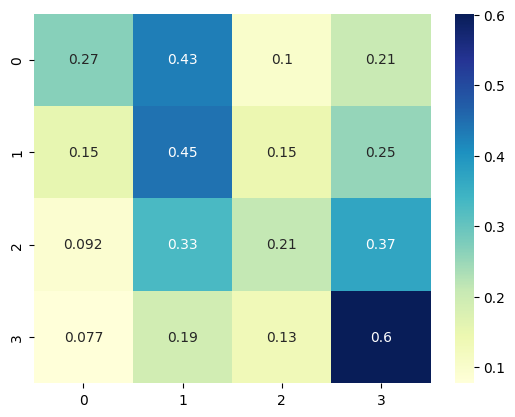

In [1108]:
our_metrics(y_test_dogs, y_pred_poly_dogs_test, normalize=True)